In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime

In [2]:
ds = pd.read_csv('S1SubActivities_timeRangeMelt.csv', index_col = None)

In [3]:
ds.head(n=4)

,subActNum,actDuration,duration
0,67,4,2003-03-27 06:43:40
1,67,4,2003-03-27 06:43:41
2,67,4,2003-03-27 06:43:42
3,67,4,2003-03-27 06:43:43


In [4]:
ds.dtypes

subActNum       int64
actDuration     int64
duration       object
dtype: object

In [5]:
ds.duration[1]

'2003-03-27 06:43:41'

In [6]:
ds.duration = pd.to_datetime(ds.duration, format = '%Y-%m-%d %H:%M:%S')

In [7]:
ds.head(n=4)

,subActNum,actDuration,duration
0,67,4,2003-03-27 06:43:40
1,67,4,2003-03-27 06:43:41
2,67,4,2003-03-27 06:43:42
3,67,4,2003-03-27 06:43:43


In [8]:
len(ds)

3085839

In [9]:
ds.dtypes

subActNum               int64
actDuration             int64
duration       datetime64[ns]
dtype: object

**Must convert subActNum FROM dtype `int64` to `string` in order for `pd.get_dummies()` to execute.**

In [10]:
ds['subActNum'] = ds['subActNum'].astype(str)

In [11]:
ds.dtypes

subActNum              object
actDuration             int64
duration       datetime64[ns]
dtype: object

In [12]:
ds = ds.drop(columns = ['actDuration'])

In [13]:
ds = ds.set_index('duration')

In [14]:
ds.head(n=4)

,subActNum
duration,
2003-03-27 06:43:40,67
2003-03-27 06:43:41,67
2003-03-27 06:43:42,67
2003-03-27 06:43:43,67


In [15]:
ds = pd.get_dummies(ds)
ds.head(n=5)

,subActNum_100,subActNum_101,subActNum_104,subActNum_105,subActNum_106,subActNum_107,subActNum_108,subActNum_118,subActNum_119,subActNum_120,...,subActNum_90,subActNum_91,subActNum_92,subActNum_93,subActNum_94,subActNum_95,subActNum_96,subActNum_97,subActNum_98,subActNum_99
duration,,,,,,,,,,,,,,,,,,,,,
2003-03-27 06:43:40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:43:41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:43:42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:43:43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:44:06,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ds.to_csv('S1SubActivities_timeRangeBoolean_DuplicateIndex.csv',index='duration')

* `len(ds)` = 3085839
*  (16 * 24 * 60 * 60) < len(ds) = This shows that their are duplicate INDEX values - this is GOOD

In [18]:
16 * 24 * 60 * 60

1382400

In [19]:
len(ds)

3085839

## Collapsing the Duplicate Indexes

In [20]:
ds = ds.groupby(['duration']).agg('sum')

In [21]:
len(ds)

830697

In [22]:
ds.head(n=4)

,subActNum_100,subActNum_101,subActNum_104,subActNum_105,subActNum_106,subActNum_107,subActNum_108,subActNum_118,subActNum_119,subActNum_120,...,subActNum_90,subActNum_91,subActNum_92,subActNum_93,subActNum_94,subActNum_95,subActNum_96,subActNum_97,subActNum_98,subActNum_99
duration,,,,,,,,,,,,,,,,,,,,,
2003-03-27 06:43:40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:43:41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:43:42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-27 06:43:43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import matplotlib.pyplot as plt

/Users/alistairgj/anaconda/envs/py36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


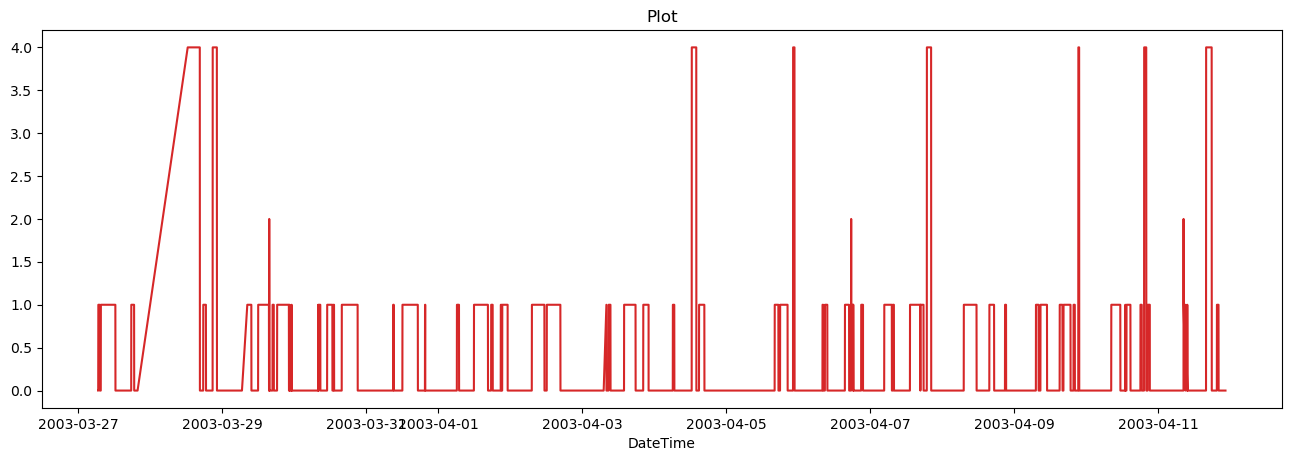

In [24]:
# Draw Plot
def plot_ds(ds, x, y, title = "", xlabel = 'DateTime', ylabel = '', dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()

plot_ds(ds, x = ds.index, y = ds.subActNum_100, title = 'Plot')   
# Now just need to collapse this down into months

* Values greater than 1 are attributed to duplication in the original dataset
* Values greater than 1 represent only x% - extremely insignificant
* All values greater than 1 will be converted to 1

In [25]:
maxValues = ds.max()                              # Checking for max values in df
maxValues.max()                                   # The maximum value of max values

8

In [26]:
ds = ds.replace(to_replace =[2, 3, 4, 5, 6, 7, 8], value = 1) 

In [27]:
maxValues = ds.max()                              # Checking for max values in df
maxValues.max()                                   # The maximum value of max values

1

In [ ]:
# Draw Plot
def plot_ds(ds, x, y, title = "", xlabel = 'DateTime', ylabel = '', dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()

plot_ds(ds, x = ds.index, y = ds.subActNum_100, title = 'Plot')   
# Now just need to collapse this down into months

In [28]:
ds.to_csv('S1SubActivities_timeRangeBoolean.csv',index='duration')

---